In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

In [2]:
df = pd.read_csv("data/AirPassengers.csv", index_col='Month', parse_dates=['Month'])

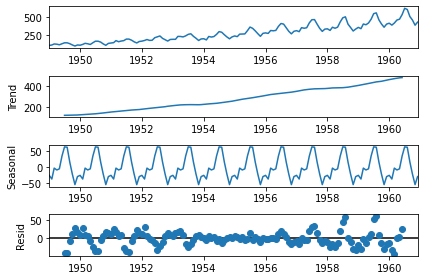

In [3]:
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

In [4]:
data = np.array([15, 20, 25, 30, 25, 27])

ses = SimpleExpSmoothing(data)
alpha = 0.7

model = ses.fit(smoothing_level=alpha, optimized=False)
forecast = model.forecast(1)

display(forecast)

array([26.66235])

In [5]:
df = pd.read_csv('data/daily-total-female-births.csv', squeeze=True, header=0, index_col=0)
result = adfuller(df.values)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_5972\1052248691.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('data/daily-total-female-births.csv', squeeze=True, header=0, index_col=0)


In [6]:
df_diff_1 = df.diff(periods=1).dropna()

result = adfuller(df_diff_1.values)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.625179
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [7]:
print ('adf: ', result[0])
print ('p-value: ', result[1])
print ('Critical values: ', result[4])
if result[0]> result[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -12.625178633871343
p-value:  1.5472400091969784e-23
Critical values:  {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
ряд стационарен


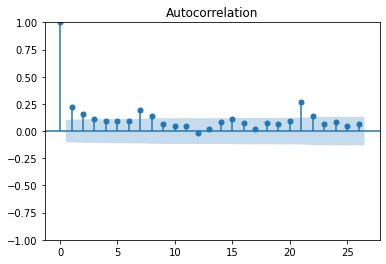

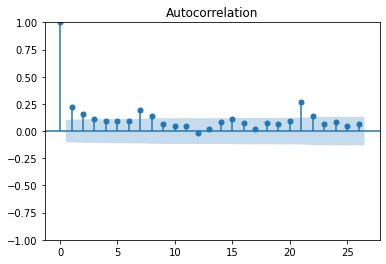

In [8]:
plot_acf(df)

In [9]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=",")

In [10]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

In [11]:
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Tue, 25 Oct 2022   AIC                          48483.625
Time:                        21:14:55   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

In [12]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

In [18]:
df = pd.read_csv('data/southern_osc.csv', index_col='Date', parse_dates=['Date'])


In [42]:
train_data = df.iloc[:-1]
test_data = df.iloc[-1]

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_5972\2430144718.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


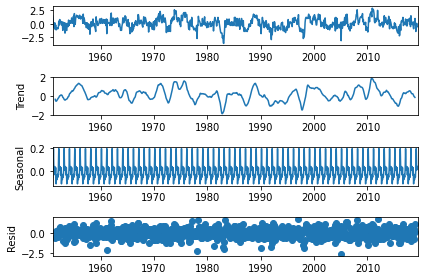

In [43]:
decomposition = seasonal_decompose(df, model='additive')
fig = decomposition.plot()
fig.show()

In [46]:
# Экспоненциальное сглаживание
ses = SimpleExpSmoothing(train_data)
alpha = 0.7

model = ses.fit(smoothing_level=alpha, optimized=False)
forecast = model.forecast(1)
display(forecast[0])
display(test_data.values[0])

c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


-0.3026933056816984

-0.5

In [48]:
def stat_test(df):
    test = adfuller(df)
    print ('adf: ', test[0] )
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')

stat_test(train_data)

adf:  -7.790397600107422
p-value:  7.970501826429105e-12
Critical values:  {'1%': -3.438369485934381, '5%': -2.865079774912655, '10%': -2.5686548826226527}
единичных корней нет, ряд стационарен


In [49]:
train_data_1 = train_data.diff(periods=1).dropna()
stat_test(train_data_1)

adf:  -9.38541515588332
p-value:  6.78004497853768e-16
Critical values:  {'1%': -3.4385608049885876, '5%': -2.865164107438179, '10%': -2.5686998068142124}
единичных корней нет, ряд стационарен


c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


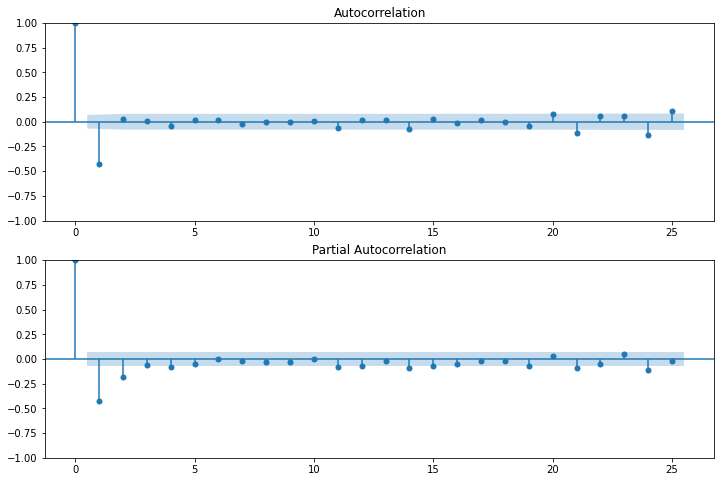

In [53]:
%matplotlib inline 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(train_data_1.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train_data_1, lags=25, ax=ax2)

In [55]:
p = 6
len(train_data)

821

In [57]:
ar_model = AutoReg(train_data, lags=p).fit()
print(ar_model.summary())

ar_pred = ar_model.predict(start=len(train_data), end=(len(train_data)), dynamic=False)
ar_pred

                            AutoReg Model Results                             
Dep. Variable:                    T_i   No. Observations:                  821
Model:                     AutoReg(6)   Log Likelihood                -859.806
Method:               Conditional MLE   S.D. of innovations              0.695
Date:                Tue, 25 Oct 2022   AIC                           1735.612
Time:                        22:05:29   BIC                           1773.237
Sample:                    07-01-1951   HQIC                          1750.053
                         - 05-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0291      0.025      1.178      0.239      -0.019       0.078
T_i.L1         0.4089      0.035     11.678      0.000       0.340       0.478
T_i.L2         0.2526      0.038      6.679      0.0

c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2019-06-01   -0.142745
Freq: MS, dtype: float64

In [58]:
ar_pred

2019-06-01   -0.142745
Freq: MS, dtype: float64

In [59]:
test_data

T_i   -0.5
Name: 2019-06-01 00:00:00, dtype: float64

In [60]:
forecast

2019-06-01   -0.302693
Freq: MS, dtype: float64